# Prosper Loan Data Exploration

# Investigation Overview


In this investigation I wanted to find out two things:

1-Factors that can be used to predict credit default

2-What factors influence Prosper rating

# Dataset Overview

This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I have been taken the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), employment status, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv("prosperLoanData.csv")


In [3]:
columns=[
     'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]
df1=df[columns]
df1=df1.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df1['LoanOriginationDate']=pd.to_datetime(df1['LoanOriginationDate'])
df1['TotalProsperLoans']=df1['TotalProsperLoans'].fillna(0)

# Loan status

* Most of the loans in the data set are actually current loans
* Past due loans are split in several groups based on the length of payment delay.
* Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

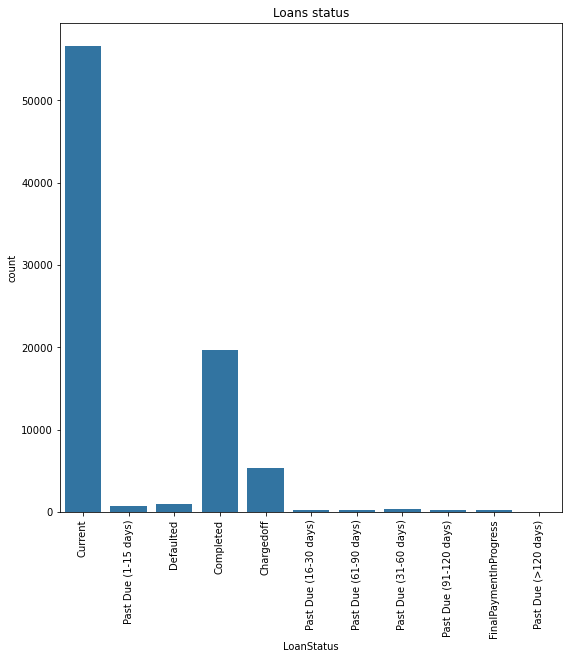

In [4]:
base_color = sn.color_palette()[0]
plt.figure(figsize=[9,9])
plt.xticks(rotation=90)
sn.countplot(data = df1, x = 'LoanStatus', color = base_color).set(title="Loans status");

# Employment Status

* The majority of borrowers are employed and all other categories as small part of borrowers.
* In small Group full time has highest, after that self empolyed are there and so on.

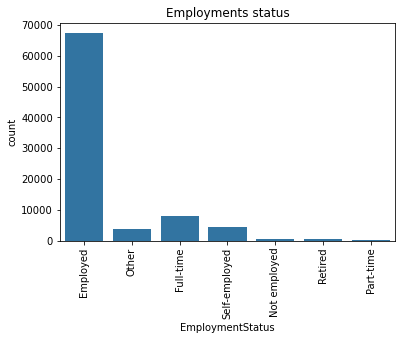

In [5]:
sn.countplot(data=df1,x='EmploymentStatus',color=base_color).set(title="Employments status")
plt.xticks(rotation=90);


In [6]:
condition = (df1['LoanStatus'] == 'Completed') | (df1['LoanStatus'] == 'Defaulted') |\
                  (df1['LoanStatus'] == 'Chargedoff')
df1 = df1[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
df1['LoanStatus'] = df1.apply(change_to_defaulted, axis=1)
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df1['ListingCategory (numeric)'] = df1.apply(reduce_categorie, axis=1)

# Status and Prosper Rating

* The most frequent rating among defaulted loans is actually D.
* The most frequent rating among Completed is alsoDand second highest is A and so on.

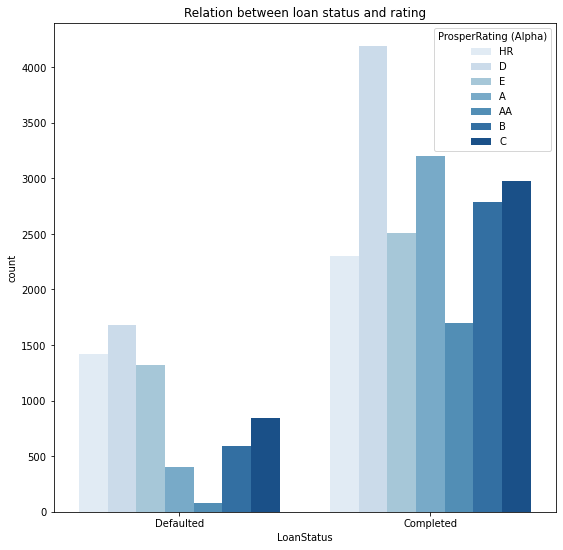

In [7]:
plt.figure(figsize=[9,9])
sn.countplot(data=df1,x="LoanStatus",hue = 'ProsperRating (Alpha)', palette = 'Blues').set(title="Relation between loan status and rating");

# Loan Status and Loan Amount

* As from Above Graph we can state that defaulted credits tend to be smaller than completed credits onces.

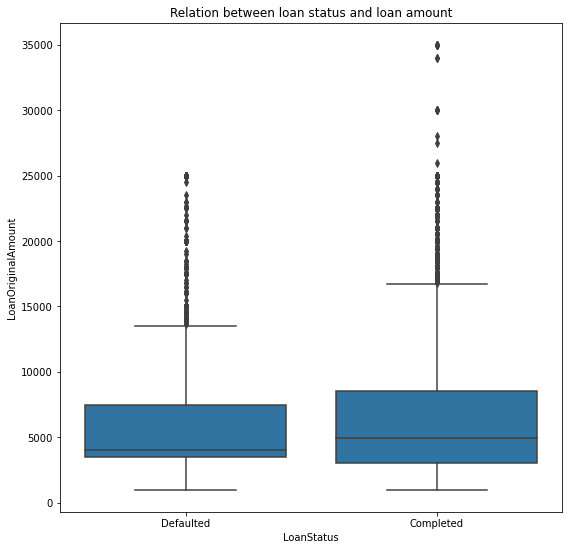

In [8]:
plt.figure(figsize=[9,9])
sn.boxplot(data = df1, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color).set(title="Relation between loan status and loan amount");

# Prosper Rating and Employment Status

* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

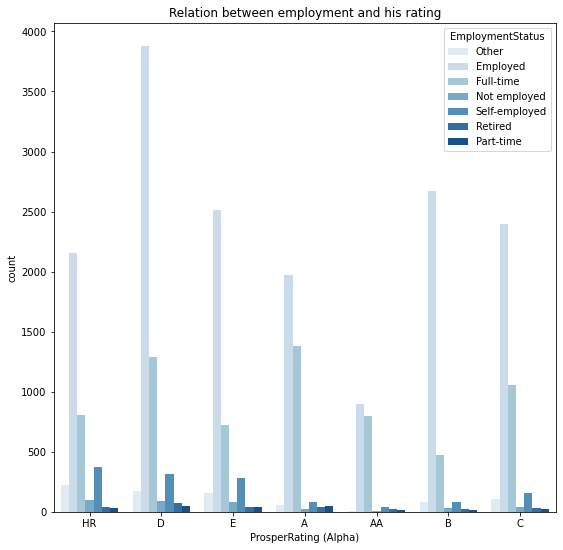

In [9]:
plt.figure(figsize = [9, 9])
sn.countplot(data = df1, x = 'ProsperRating (Alpha)' , hue = 'EmploymentStatus', palette = 'Blues').set(title="Relation between employment and his rating");

# Rating, Loan Amount and Loan Status

* Except for the lowest ratings defaulted credits tend to be larger than completed.

* Most of the defaulted credits comes from individuals with low Prosper rating

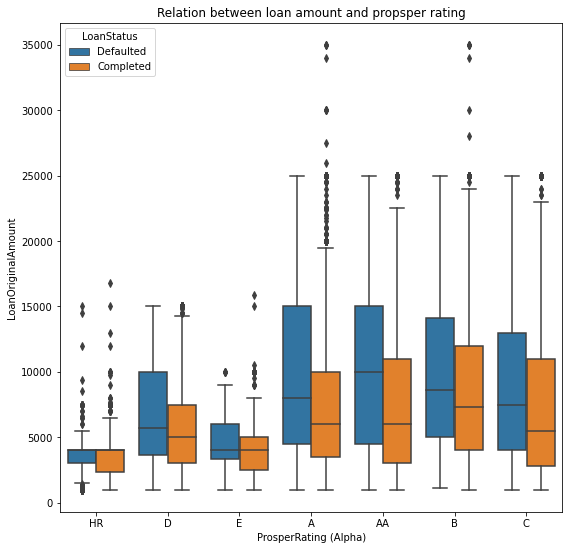

In [10]:
plt.figure(figsize = [9, 9])
sn.boxplot(data=df1, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus').set(title="Relation between loan amount and propsper rating");

# Relationships between Credit category, Credit rating and outcome of Credit.

* There are 5 graphs in the second one has much up and downs in it other than all of them
* There is no substantial difference for default rates in different categories broken up by ratings.

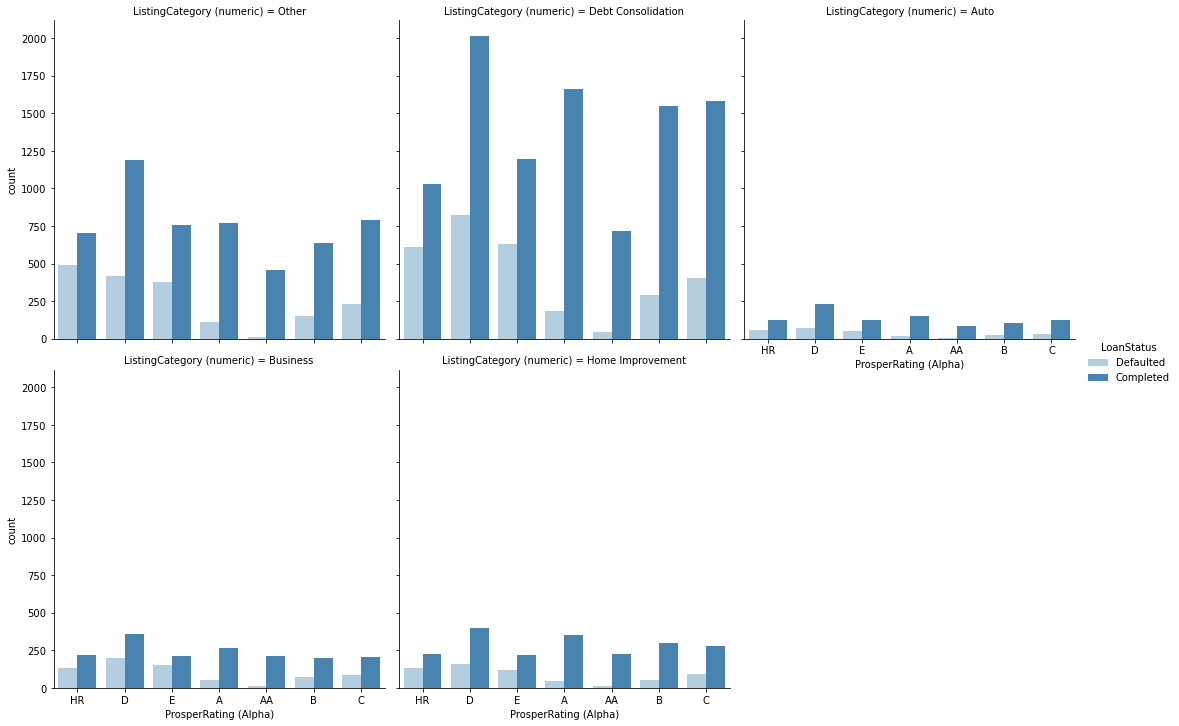

In [11]:
sn.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df1, kind = 'count', palette = 'Blues', col_wrap = 3);

In [ ]:
!jupyter nbconvert slide.ipynb --to slides --post serve  --no-input --no-prompt